In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'1.13.1'

日志查看
tensorboard --logdir="./graphs/linear_reg" 

In [3]:
%matplotlib inline

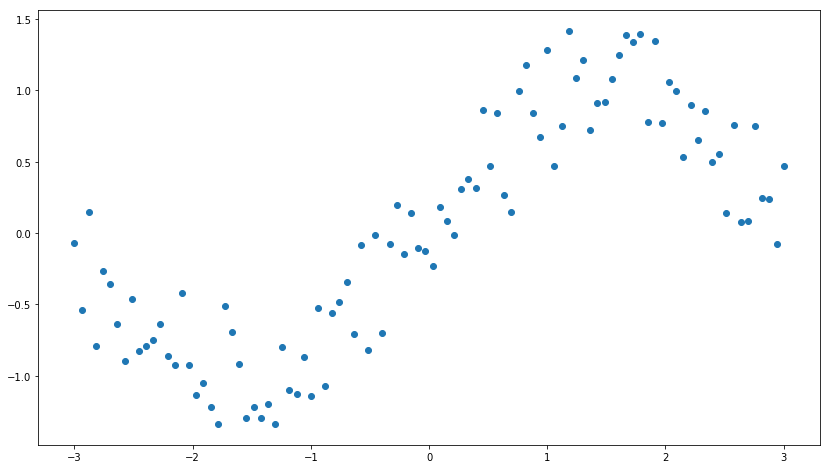

In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(14,8) # 图长宽
n_observations = 100 # 点的数量
xs = np.linspace(-3, +3, n_observations) # np.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)
ys = np.sin(xs)+np.random.uniform(-0.5, +0.5, n_observations) # uniform(low=0.0, high=1.0, size=None) 均匀分布
plt.scatter(xs, ys)
plt.show()

In [5]:
x = tf.placeholder(tf.float32, name='x')
y = tf.placeholder(tf.float32, name='y')
W = tf.Variable(tf.random_normal([1]), name='weight') # Outputs random values from a normal distribution. 正态分布
b = tf.Variable(tf.random_normal([1]), name='b')
Y_pred = tf.add(tf.multiply(x, W), b)
loss = tf.square(y-Y_pred, name='loss')

learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
n_samples = xs.shape[0]

Instructions for updating:
Colocations handled automatically by placer.


In [6]:
epoches = 50
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    writer = tf.summary.FileWriter('./graphs/linear_reg', sess.graph)
    for i in range(epoches):
        total_loss = 0
        for x_batch, y_batch in zip(xs, ys):
            _, l = sess.run([optimizer, loss], feed_dict={x:x_batch, y: y_batch})
            total_loss += l
        if i%5 == 0:
            print('epoch %s: loss: %s'%(i, total_loss/n_samples))
    writer.close()
    W, b = sess.run([W, b])

epoch 0: loss: [0.6756633]
epoch 5: loss: [0.19774282]
epoch 10: loss: [0.1977441]
epoch 15: loss: [0.1977441]
epoch 20: loss: [0.19774409]
epoch 25: loss: [0.1977441]
epoch 30: loss: [0.1977441]
epoch 35: loss: [0.19774409]
epoch 40: loss: [0.1977441]
epoch 45: loss: [0.1977441]


In [7]:
print(W)
print(b)

[0.21630518]
[-0.16769516]


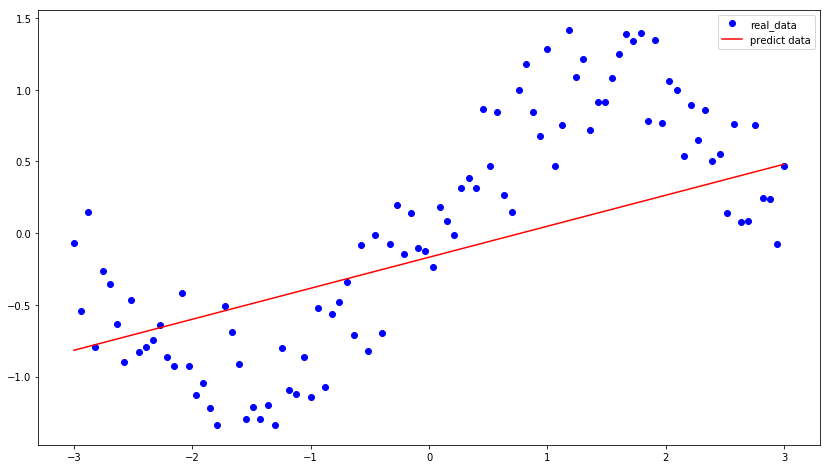

In [8]:
plt.plot(xs, ys, 'bo', label='real_data')
plt.plot(xs, xs*W+b, 'r', label='predict data')
plt.legend()
plt.show()